<a href="https://colab.research.google.com/github/JohnOliver23/DatasetsML/blob/master/projeto_topicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn import metrics 
import pandas as pd
from sklearn import tree
from sklearn import preprocessing
from IPython.display import Markdown as md
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# =========== WINE =============
url_wine = "https://raw.githubusercontent.com/kmlporto/machinelearning/master/database/wine.data"
col_names_wine = ['label', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13']
feature_cols_wine = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13']

# =========== BALANCE-SCALE =============
url_balance_scale = "https://raw.githubusercontent.com/JohnOliver23/DatasetsML/master/database/balance-scale.data"
col_names_balance_scale = ['label', 'x1', 'x2', 'x3', 'x4']
feature_cols_balance_scale = ['x1', 'x2', 'x3', 'x4']

# ========== ABALONE ===========
url_abalone = "https://raw.githubusercontent.com/JohnOliver23/DatasetsML/master/database/abalone.data"
col_names_abalone = ['label', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']
feature_cols_abalone = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']

raw_dataset_wine = pd.read_csv( url_wine , header=None, names=col_names_wine) 
raw_dataset_balance_scale = pd.read_csv( url_balance_scale ,header=None, names=col_names_balance_scale) 
raw_dataset_abalone = pd.read_csv( url_abalone ,header=None, names=col_names_abalone)

In [210]:
# WINE DATASET TESTS

# Creating result vars 
wine_results = {
    'tree': 0,
    'knn5': 0,
    'knn10': 0,
    'mlp1': 0,
    'mlp2': 0,
    'kmeans': 0
} 

# X and Y vars 

wine_x = raw_dataset_wine[feature_cols_wine]
wine_y = raw_dataset_wine.label

x_train_wine, x_test_wine, y_train_wine, y_test_wine = train_test_split(wine_x, wine_y, test_size=0.2, random_state=None, stratify=wine_y) 


#Tree
wine_tree = tree.DecisionTreeClassifier()
wine_tree = wine_tree.fit(x_train_wine, y_train_wine )
wine_test_result = wine_tree.predict(x_test_wine)

#Taxa de acertos Three
wine_results['tree']    =  metrics.accuracy_score(y_test_wine, wine_test_result) * 100

# KNN n=5 

wine_knn5= KNeighborsClassifier(n_neighbors=5)
wine_knn5.fit(x_train_wine, y_train_wine)
wine_test_result = wine_knn5.predict(x_test_wine)

#Taxa de acertos Knn5
wine_results['knn5'] = metrics.accuracy_score(y_test_wine, wine_test_result) * 100

# KNN n=10 
wine_knn10 = KNeighborsClassifier(n_neighbors=10)
wine_knn10.fit(x_train_wine, y_train_wine)
wine_test_result = wine_knn10.predict(x_test_wine)

#Taxa de acertos Knn10
wine_results['knn10'] = metrics.accuracy_score(y_test_wine, wine_test_result) * 100

# MLP1 
wine_mlp1 = MLPClassifier(hidden_layer_sizes=(10,8), max_iter=500, alpha=0.0001,
                      verbose=10,  random_state=21,tol=0.000000001)
#wine_mlp1 = MLPClassifier(hidden_layer_sizes=(10,8))
wine_mlp1.fit(x_train_wine, y_train_wine )
wine_test_result = wine_mlp1.predict(x_test_wine)

wine_results['mlp1'] = metrics.accuracy_score(y_test_wine, wine_test_result) * 100

# MLP2 
wine_mlp2 = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=500, alpha=0.0001,
                      verbose=10,  random_state=21,tol=0.000000001)
#wine_mlp2 = MLPClassifier(hidden_layer_sizes=(10, 5))
wine_mlp2.fit(x_train_wine, y_train_wine)
wine_test_result = wine_mlp2.predict(x_test_wine)

wine_results['mlp2'] = metrics.accuracy_score(y_test_wine, wine_test_result) * 100


# Kmeans
wine_km = KMeans(n_clusters=3)
wine_km.fit(x_train_wine, y_train_wine)
wine_test_result = wine_km.predict(x_test_wine)


wine_results['kmeans'] = metrics.accuracy_score(y_test_wine, wine_test_result) * 100

x = raw_dataset_wine.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13]].values
kmeans = KMeans(n_clusters=3)#muda de acordo com as classes
y_kmeans = kmeans.fit_predict(x)

kmeans.cluster_centers_

ErrorWineKm =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    ErrorWineKm.append(kmeans.inertia_)

print(wine_results)


Iteration 1, loss = 239.33997368
Iteration 2, loss = 236.26766309
Iteration 3, loss = 233.21584649
Iteration 4, loss = 230.18424471
Iteration 5, loss = 227.17304359
Iteration 6, loss = 224.18245739
Iteration 7, loss = 221.21270078
Iteration 8, loss = 218.26396241
Iteration 9, loss = 215.33640538
Iteration 10, loss = 212.43016552
Iteration 11, loss = 209.54534893
Iteration 12, loss = 206.68202992
Iteration 13, loss = 203.84024914
Iteration 14, loss = 201.02001212
Iteration 15, loss = 198.22128798
Iteration 16, loss = 195.44400863
Iteration 17, loss = 192.68806828
Iteration 18, loss = 189.95332329
Iteration 19, loss = 187.23959200
Iteration 20, loss = 184.54665444
Iteration 21, loss = 181.87425165
Iteration 22, loss = 179.22208459
Iteration 23, loss = 176.58981282
Iteration 24, loss = 173.97705318
Iteration 25, loss = 171.38337847
Iteration 26, loss = 168.80831641
Iteration 27, loss = 166.25134907
Iteration 28, loss = 163.71191258
Iteration 29, loss = 161.18939756
Iteration 30, loss = 15

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


{'tree': 80.55555555555556, 'knn5': 69.44444444444444, 'knn10': 61.111111111111114, 'mlp1': 50.0, 'mlp2': 61.111111111111114, 'kmeans': 41.66666666666667}


In [211]:
# balance_scale DATASET TESTS

# Creating result vars 
balance_scale_results = {
    'tree': 0,
    'knn5': 0,
    'knn10': 0,
    'mlp1': 0,
    'mlp2': 0,
    'kmeans': 0
} 

# X and Y vars 

balance_scale_x = raw_dataset_balance_scale[feature_cols_balance_scale]
balance_scale_y = raw_dataset_balance_scale.label

x_train_balance_scale, x_test_balance_scale, y_train_balance_scale, y_test_balance_scale = train_test_split(balance_scale_x, balance_scale_y, test_size=0.2, random_state=None, stratify=balance_scale_y) 


#Tree
balance_scale_tree = tree.DecisionTreeClassifier()
balance_scale_tree = balance_scale_tree.fit(x_train_balance_scale,y_train_balance_scale)
balance_scale_test_result = balance_scale_tree.predict(x_test_balance_scale)

#Taxa de acertos Three
balance_scale_results['tree']    =  metrics.accuracy_score(y_test_balance_scale, balance_scale_test_result) * 100

# KNN n=5 

balance_scale_knn5= KNeighborsClassifier(n_neighbors=5)
balance_scale_knn5.fit(x_train_balance_scale, y_train_balance_scale)
balance_scale_test_result = balance_scale_knn5.predict(x_test_balance_scale)

#Taxa de acertos Knn5
balance_scale_results['knn5'] = metrics.accuracy_score(y_test_balance_scale, balance_scale_test_result) * 100

# KNN n=10 
balance_scale_knn10 = KNeighborsClassifier(n_neighbors=10)
balance_scale_knn10.fit(x_train_balance_scale,y_train_balance_scale)
balance_scale_test_result = balance_scale_knn10.predict(x_test_balance_scale)

#Taxa de acertos Knn10
balance_scale_results['knn10'] = metrics.accuracy_score(y_test_balance_scale, balance_scale_test_result) * 100

# MLP1 
balance_scale_mlp1 = MLPClassifier(hidden_layer_sizes=(10,8), max_iter=300, alpha=0.0001,
                      verbose=10,  random_state=21,tol=0.000000001)
#balance_scale_mlp1 = MLPClassifier(hidden_layer_sizes=(10,8))
balance_scale_mlp1.fit(x_train_balance_scale,y_train_balance_scale )
balance_scale_test_result = balance_scale_mlp1.predict(x_test_balance_scale)

balance_scale_results['mlp1'] = metrics.accuracy_score(y_test_balance_scale, balance_scale_test_result) * 100

# MLP2 
balance_scale_mlp2 = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=300, alpha=0.0001,
                      verbose=10,  random_state=21,tol=0.000000001)
#balance_scale_mlp2 = MLPClassifier(hidden_layer_sizes=(10, 5))
balance_scale_mlp2.fit(x_train_balance_scale,y_train_balance_scale)
balance_scale_test_result = balance_scale_mlp2.predict(x_test_balance_scale)

balance_scale_results['mlp2'] = metrics.accuracy_score(y_test_balance_scale, balance_scale_test_result) * 100


# Kmeans
balance_scale_km = KMeans(n_clusters=3)
balance_scale_km.fit(x_train_balance_scale,y_train_balance_scale)
balance_scale_test_result = balance_scale_km.predict(x_test_balance_scale)


balance_scale_results['kmeans'] = metrics.accuracy_score(y_test_balance_scale, balance_scale_test_result) * 100

x = raw_dataset_balance_scale.iloc[:, [1,2,3,4]].values
kmeans = KMeans(n_clusters=3)#muda de acordo com as classes
y_kmeans = kmeans.fit_predict(x)

kmeans.cluster_centers_

ErrorBalanceScaleKm =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    ErrorBalanceScaleKm.append(kmeans.inertia_)

print(balance_scale_results)

Iteration 1, loss = 2.24138742
Iteration 2, loss = 2.13436632
Iteration 3, loss = 2.03376329
Iteration 4, loss = 1.94135001
Iteration 5, loss = 1.85377283
Iteration 6, loss = 1.77541369
Iteration 7, loss = 1.70402737
Iteration 8, loss = 1.63842024
Iteration 9, loss = 1.57861096
Iteration 10, loss = 1.52391808
Iteration 11, loss = 1.47473076
Iteration 12, loss = 1.42921101
Iteration 13, loss = 1.38826062
Iteration 14, loss = 1.35043685
Iteration 15, loss = 1.31603470
Iteration 16, loss = 1.28463753
Iteration 17, loss = 1.25642260
Iteration 18, loss = 1.22901449
Iteration 19, loss = 1.20368405
Iteration 20, loss = 1.17978266
Iteration 21, loss = 1.15785183
Iteration 22, loss = 1.13586294
Iteration 23, loss = 1.11542636
Iteration 24, loss = 1.09574487
Iteration 25, loss = 1.07705036
Iteration 26, loss = 1.06049963
Iteration 27, loss = 1.04346123
Iteration 28, loss = 1.02739822
Iteration 29, loss = 1.01290900
Iteration 30, loss = 0.99848671
Iteration 31, loss = 0.98378559
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 86, loss = 0.99676860
Iteration 87, loss = 0.99059128
Iteration 88, loss = 0.98207675
Iteration 89, loss = 0.97251532
Iteration 90, loss = 0.95909632
Iteration 91, loss = 0.94363252
Iteration 92, loss = 0.92572040
Iteration 93, loss = 0.90424999
Iteration 94, loss = 0.88245887
Iteration 95, loss = 0.85531415
Iteration 96, loss = 0.82869829
Iteration 97, loss = 0.80261302
Iteration 98, loss = 0.77930210
Iteration 99, loss = 0.76205757
Iteration 100, loss = 0.74852081
Iteration 101, loss = 0.73649798
Iteration 102, loss = 0.72415325
Iteration 103, loss = 0.71180948
Iteration 104, loss = 0.70062009
Iteration 105, loss = 0.68939755
Iteration 106, loss = 0.67945847
Iteration 107, loss = 0.66944130
Iteration 108, loss = 0.65911896
Iteration 109, loss = 0.64919362
Iteration 110, loss = 0.63948711
Iteration 111, loss = 0.63002268
Iteration 112, loss = 0.62089935
Iteration 113, loss = 0.61201711
Iteration 114, loss = 0.60347659
Iteration 115, loss = 0.59528021
Iteration 116, loss = 0.

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


{'tree': 77.60000000000001, 'knn5': 85.6, 'knn10': 85.6, 'mlp1': 88.8, 'mlp2': 90.4, 'kmeans': 0.0}


In [212]:
# ABALONE DATASET TESTS

# Creating result vars 
abalone_results = {
    'tree': 0,
    'knn5': 0,
    'knn10': 0,
    'mlp1': 0,
    'mlp2': 0,
    'kmeans': 0
} 

# X and Y vars 

abalone_x = raw_dataset_abalone[feature_cols_abalone]
abalone_y = raw_dataset_abalone.label

x_train_abalone, x_test_abalone, y_train_abalone, y_test_abalone = train_test_split(abalone_x, abalone_y, test_size=0.2, random_state=None, stratify=abalone_y) 


#Tree
abalone_tree = tree.DecisionTreeClassifier()
abalone_tree = abalone_tree.fit(x_train_abalone,y_train_abalone)
abalone_test_result = abalone_tree.predict(x_test_abalone)

#Taxa de acertos Three
abalone_results['tree']    =  metrics.accuracy_score(y_test_abalone, abalone_test_result) * 100

# KNN n=5 

abalone_knn5= KNeighborsClassifier(n_neighbors=5)
abalone_knn5.fit(x_train_abalone, y_train_abalone)
abalone_test_result = abalone_knn5.predict(x_test_abalone)

#Taxa de acertos Knn5
abalone_results['knn5'] = metrics.accuracy_score(y_test_abalone, abalone_test_result) * 100

# KNN n=10 
abalone_knn10 = KNeighborsClassifier(n_neighbors=10)
abalone_knn10.fit(x_train_abalone,y_train_abalone)
abalone_test_result = abalone_knn10.predict(x_test_abalone)

#Taxa de acertos Knn10
abalone_results['knn10'] = metrics.accuracy_score(y_test_abalone, abalone_test_result) * 100

# MLP1 
abalone_mlp1 = MLPClassifier(hidden_layer_sizes=(10,8), max_iter=300, alpha=0.0001,
                      verbose=10,  random_state=21,tol=0.000000001)
#abalone_mlp1 = MLPClassifier(hidden_layer_sizes=(10,8))
abalone_mlp1.fit(x_train_abalone,y_train_abalone )
abalone_test_result = abalone_mlp1.predict(x_test_abalone)

abalone_results['mlp1'] = metrics.accuracy_score(y_test_abalone, abalone_test_result) * 100

# MLP2 
abalone_mlp2 = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=300, alpha=0.0001,
                      verbose=10,  random_state=21,tol=0.000000001)
#abalone_mlp2 = MLPClassifier(hidden_layer_sizes=(10, 5))
abalone_mlp2.fit(x_train_abalone,y_train_abalone)
abalone_test_result = abalone_mlp2.predict(x_test_abalone)

abalone_results['mlp2'] = metrics.accuracy_score(y_test_abalone, abalone_test_result) * 100


# Kmeans
abalone_km = KMeans(n_clusters=2)
abalone_km.fit(x_train_abalone,y_train_abalone)
abalone_test_result = abalone_km.predict(x_test_abalone)


abalone_results['kmeans'] = metrics.accuracy_score(y_test_abalone, abalone_test_result) * 100

x = raw_dataset_abalone.iloc[:, [1,2,3,4,5,6,7,8]].values
kmeans = KMeans(n_clusters=2)#muda de acordo com as classes
y_kmeans = kmeans.fit_predict(x)

kmeans.cluster_centers_

ErrorAbaloneKm =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    ErrorAbaloneKm.append(kmeans.inertia_)

print(abalone_results)


Iteration 1, loss = 1.14338059
Iteration 2, loss = 1.13790718
Iteration 3, loss = 1.13360999
Iteration 4, loss = 1.12991945
Iteration 5, loss = 1.12641478
Iteration 6, loss = 1.12334251
Iteration 7, loss = 1.12051360
Iteration 8, loss = 1.11697937
Iteration 9, loss = 1.11343892
Iteration 10, loss = 1.10084120
Iteration 11, loss = 1.09011444
Iteration 12, loss = 1.06569580
Iteration 13, loss = 1.03750197
Iteration 14, loss = 1.01610243
Iteration 15, loss = 0.99917571
Iteration 16, loss = 0.98503038
Iteration 17, loss = 0.97254732
Iteration 18, loss = 0.96111735
Iteration 19, loss = 0.95149480
Iteration 20, loss = 0.94303348
Iteration 21, loss = 0.93524153
Iteration 22, loss = 0.92829950
Iteration 23, loss = 0.92233006
Iteration 24, loss = 0.91706342
Iteration 25, loss = 0.91163268
Iteration 26, loss = 0.90761884
Iteration 27, loss = 0.90414787
Iteration 28, loss = 0.90076615
Iteration 29, loss = 0.89732960
Iteration 30, loss = 0.89495646
Iteration 31, loss = 0.89279559
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


{'tree': 47.60765550239234, 'knn5': 52.15311004784689, 'knn10': 50.95693779904307, 'mlp1': 53.94736842105263, 'mlp2': 51.674641148325364, 'kmeans': 0.0}


# **Relatório de desempenho dos algoritimos**

## **Wine**

##### **Resultados Algoritmos**

In [213]:

pd.DataFrame.from_dict(wine_results, orient='index')

,0
tree,80.555556
knn5,69.444444
knn10,61.111111
mlp1,50.000000
mlp2,61.111111
kmeans,41.666667


##### **Curva de taxa de erro em iterações da MLP1**

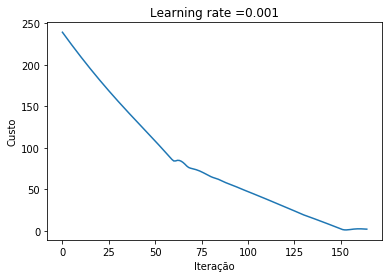

In [214]:
plt.ylabel('Custo')
plt.xlabel('Iteração')
plt.title("Learning rate =" + str(0.001))
plt.plot(wine_mlp1.loss_curve_)

##### **Curva de taxa de erro em iterações da MLP2**

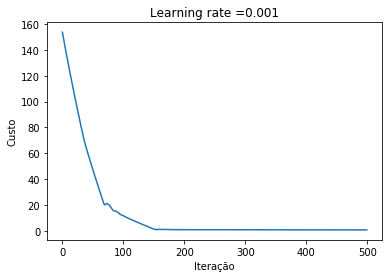

In [215]:
plt.ylabel('Custo')
plt.xlabel('Iteração')
plt.title("Learning rate =" + str(0.001))
plt.plot(wine_mlp2.loss_curve_)

##### **Curva de taxa de erro em iterações K-means**

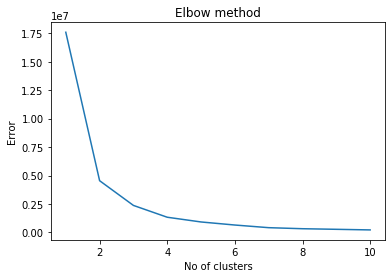

In [216]:


plt.plot(range(1,11), ErrorWineKm)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

## **Balance Scale**

In [217]:
pd.DataFrame.from_dict(balance_scale_results, orient='index')

,0
tree,77.6
knn5,85.6
knn10,85.6
mlp1,88.8
mlp2,90.4
kmeans,0.0


##### **Curva de taxa de erro em iterações da MLP1**

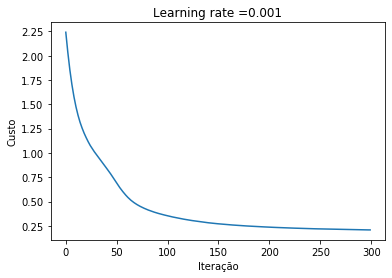

In [218]:
plt.ylabel('Custo')
plt.xlabel('Iteração')
plt.title("Learning rate =" + str(0.001))
plt.plot(balance_scale_mlp1.loss_curve_)

##### **Curva de taxa de erro em iterações da MLP2**

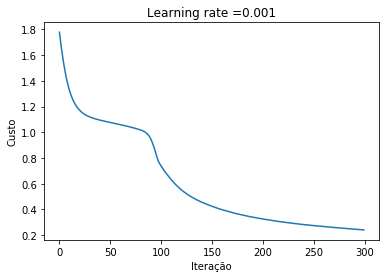

In [219]:
plt.ylabel('Custo')
plt.xlabel('Iteração')
plt.title("Learning rate =" + str(0.001))
plt.plot(balance_scale_mlp2.loss_curve_)

##### **Curva de taxa de erro em iterações K-means**

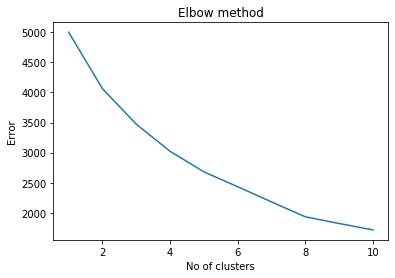

In [220]:
plt.plot(range(1,11), ErrorBalanceScaleKm)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

## **Abalone**

In [221]:
pd.DataFrame.from_dict(abalone_results, orient='index')

,0
tree,47.607656
knn5,52.153110
knn10,50.956938
mlp1,53.947368
mlp2,51.674641
kmeans,0.000000


##### **Curva de taxa de erro em iterações da MLP1**

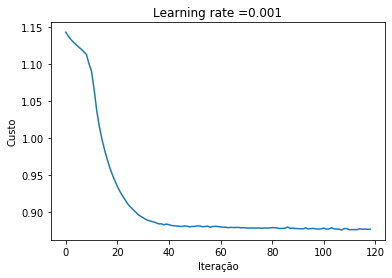

In [223]:
plt.ylabel('Custo')
plt.xlabel('Iteração')
plt.title("Learning rate =" + str(0.001))
plt.plot(abalone_mlp1.loss_curve_)

##### **Curva de taxa de erro em iterações da MLP2**


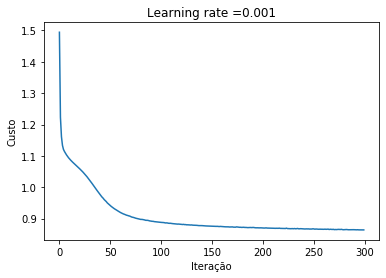

In [224]:
plt.ylabel('Custo')
plt.xlabel('Iteração')
plt.title("Learning rate =" + str(0.001))
plt.plot(abalone_mlp2.loss_curve_)

##### **Curva de taxa de erro em iterações K-means**

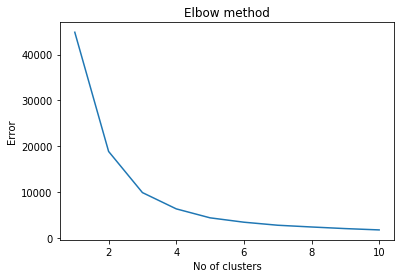

In [225]:
plt.plot(range(1,11), ErrorAbaloneKm)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()